<a href="https://colab.research.google.com/github/neuroqudit/pykoppu/blob/main/notebooks/08_factorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Integer Factorization with KOPPU

This notebook demonstrates solving the Integer Factorization problem using the KOPPU OPU. The goal is to decompose a composite number $N$ into its prime factors $p$ and $q$.

## 1. Problem Formulation

Given a composite integer $N$, we want to find two integers $p$ and $q$ such that:

$$ N = p \times q $$

We represent $p$ and $q$ in binary form:

$$ p = \sum_{i=0}^{n-1} x_i 2^i, \quad q = \sum_{j=0}^{m-1} y_j 2^j $$

Where $x_i, y_j \in \{0, 1\}$ are binary variables.

In [1]:
!pip install pykoppu==0.2.34a0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 22.3 MB/s eta 0:00:00


In [2]:
import sys
import os

# Ensure we can import the local pykoppu package
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))

import pykoppu as pk

# 1. Define Factorization Instance
target = 15  # We want to factor 15
penalty = 10.0

## 2. PUBO Mapping

We map the factorization problem to a Quadratic Unconstrained Binary Optimization (QUBO) problem using a multiplication circuit reduction.

1.  **Auxiliary Variables**: We introduce auxiliary variables $z_{ij}$ to represent the product of bits $x_i$ and $y_j$.
2.  **Consistency Hamiltonian**: We enforce $z_{ij} = x_i y_j$ (AND gate) using a penalty term:
    $$ H_{cons} = P \sum_{i,j} (3z_{ij} + x_i y_j - 2x_i z_{ij} - 2y_j z_{ij}) $$
3.  **Factorization Hamiltonian**: We minimize the squared difference between the target $N$ and the constructed product:
    $$ H_{fact} = (N - \sum_{i,j} 2^{i+j} z_{ij})^2 $$

The total Hamiltonian is $H = H_{fact} + H_{cons}$. The ground state ($H=0$) corresponds to the valid factors.

Mapping factorization of 15 to OPU...
Solving...
Visualizing OPU Dynamics...


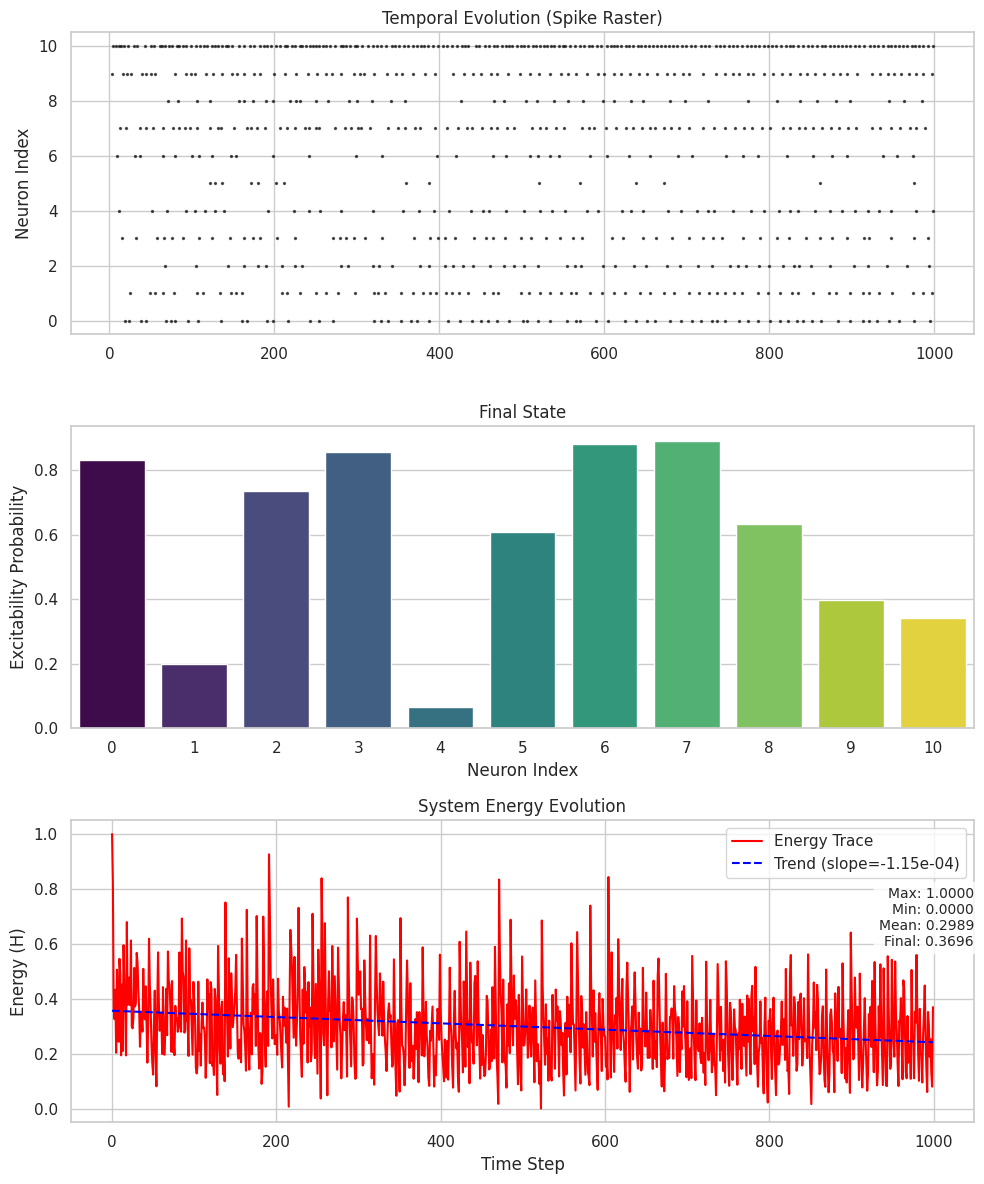

In [3]:
# 2. Create Factorization Problem
print(f"Mapping factorization of {target} to OPU...")
problem = pk.problems.math.Factorization(target=target, penalty=penalty)

# 3. Solve
print("Solving...")
process = pk.oos.Process(problem, backend='cpu', t=1000)
result = process.run()

# 4. Display OPU Dynamics
print("Visualizing OPU Dynamics...")
result.plot()

## 3. Solution Analysis

We visualize the result. The solution is decoded from the final state of the OPU. If the product of the decoded $p$ and $q$ equals $N$, the factorization is successful.

Visualizing Solution...


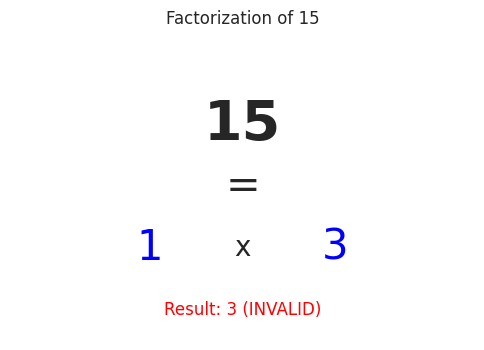


Decoded Factors: p=1, q=3
Product: 3 (Target: 15)
Valid: False


In [4]:
# 5. Analyse Solution
print("Visualizing Solution...")
problem.plot(result, threshold=0.5)

# Decode metrics
metrics = problem.evaluate(result.solution)
print(f"\nDecoded Factors: p={metrics['p']}, q={metrics['q']}")
print(f"Product: {metrics['product']} (Target: {metrics['target']})")
print(f"Valid: {metrics['valid']}")